
*  Nama : Alifiyul Akyun
*  No : 04
*  Kelas : TI-3B
*  NIM : 2041720036


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

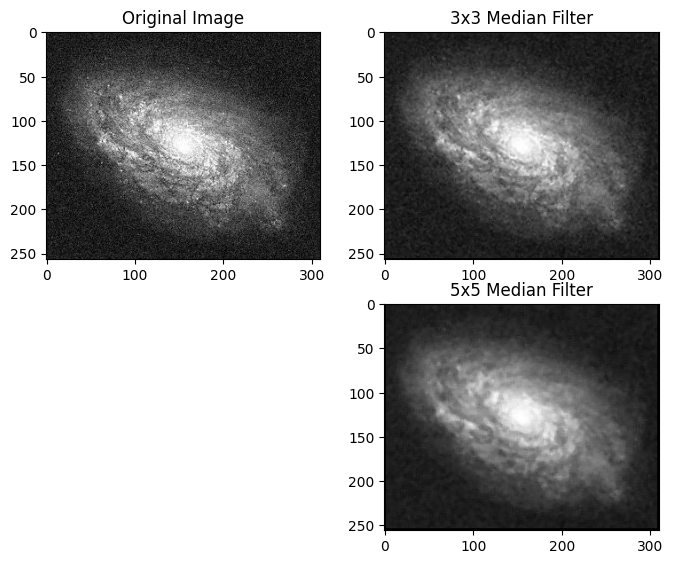

In [ ]:
def MedianFilter(image, filter_size):
    # Buat array kosong dengan ukuran yang sama dengan gambar input
    output = np.zeros(image.shape, np.uint8)

    # Buat array kernel filter dengan ukuran yang sama dengan filter_size
    filter_array = [image[0][0]] * filter_size

    # ukuran filter = 3x3
    if filter_size == 9:
        for j in range(1, image.shape[0]-1):
            for i in range(1, image.shape[1]-1):
                filter_array[0] = image[j-1, i-1]
                filter_array[1] = image[j, i-1]
                filter_array[2] = image[j+1, i-1]
                filter_array[3] = image[j-1, i]
                filter_array[4] = image[j, i]
                filter_array[5] = image[j+1, i]
                filter_array[6] = image[j-1, i+1]
                filter_array[7] = image[j, i+1]
                filter_array[8] = image[j+1, i+1]

                # mengurutkan array
                filter_array.sort()

                # Masukkan angka median ke dalam array output
                output[j][i] = filter_array[4]

    # deal with filter size = 5x5
    elif filter_size == 25:
        for j in range(2, image.shape[0]-2):
            for i in range(2, image.shape[1]-2):
                filter_array[0] = image[j-2, i-2]
                filter_array[1] = image[j-1, i-2]
                filter_array[2] = image[j, i-2]
                filter_array[3] = image[j+1, i-2]
                filter_array[4] = image[j+2, i-2]
                filter_array[5] = image[j-2, i-1]
                filter_array[6] = image[j-1, i-1]
                filter_array[7] = image[j, i-1]
                filter_array[8] = image[j+1, i-1]
                filter_array[9] = image[j+2, i-1]
                filter_array[10] = image[j-2, i]
                filter_array[11] = image[j-1, i]
                filter_array[12] = image[j, i]
                filter_array[13] = image[j+1, i]
                filter_array[14] = image[j+2, i]
                filter_array[15] = image[j-2, i+1]
                filter_array[16] = image[j-1, i+1]
                filter_array[17] = image[j, i+1]
                filter_array[18] = image[j+1, i+1]
                filter_array[19] = image[j+2, i+1]
                filter_array[20] = image[j-2, i+2]
                filter_array[21] = image[j-1, i+2]
                filter_array[22] = image[j, i+2]
                filter_array[23] = image[j+1, i+2]
                filter_array[24] = image[j+2, i+2]

                # sort the array
                filter_array.sort()

                # put the median number into output array
                output[j][i] = filter_array[12]
    return output


def main():
    # read image
    img_gray = cv2.imread('/content/drive/MyDrive/PCVK/image/noises-20230223T140529Z-001/noises/1.jpg')
    img_gray_galaxy= cv.cvtColor(img_gray, cv.COLOR_BGR2GRAY)


  
    # use 3x3 median filter
    median_3x3_galaxy = MedianFilter(img_gray_galaxy, 9)


    # use 5x5 median filter
    median_5x5_galaxy = MedianFilter(img_gray_galaxy, 25)

    # set up side-by-side image display
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(8)

    # display the oringinal image
    fig.add_subplot(3, 2, 1)
    plt.title('Original Image')
    plt.imshow(img_gray_galaxy, cmap='gray')
 
    # display 3x3 median filter
    fig.add_subplot(3, 2, 2)
    plt.title('3x3 Median Filter')
    plt.imshow(median_3x3_galaxy, cmap='gray')

    # display 5x5 median filter
    fig.add_subplot(3, 2, 4)
    plt.title('5x5 Median Filter')
    plt.imshow(median_5x5_galaxy, cmap='gray')

    plt.show()


if __name__ == "__main__":
    main()

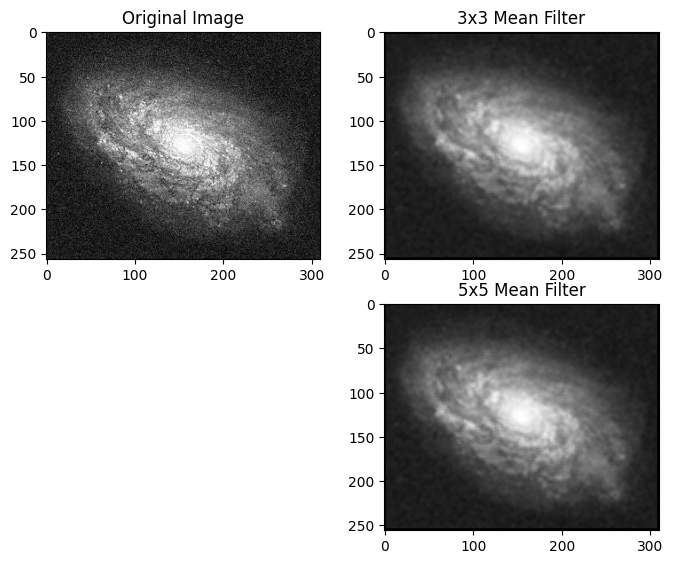

In [ ]:
def MeanFilter(image, filter_size):
    # create an empty array with same size as input image
    output = np.zeros(image.shape, np.uint8)

    # creat an empty variable
    result = 0

    # deal with filter size = 3x3
    if filter_size == 9:
        for j in range(1, image.shape[0]-1):
            for i in range(1, image.shape[1]-1):
                for y in range(-1, 2):
                    for x in range(-1, 2):
                        result = result + image[j+y, i+x]
                output[j][i] = int(result / filter_size)
                result = 0

    # deal with filter size = 5x5
    elif filter_size == 25:
        for j in range(2, image.shape[0]-2):
            for i in range(2, image.shape[1]-2):
                for y in range(-2, 3):
                    for x in range(-2, 3):
                        result = result + image[j+y, i+x]
                output[j][i] = int(result / filter_size)
                result = 0
        return output


def main():
    # read image
    img_gray = cv2.imread('/content/drive/MyDrive/PCVK/image/noises-20230223T140529Z-001/noises/1.jpg')
    img_gray_galaxy= cv.cvtColor(img_gray, cv.COLOR_BGR2GRAY)



    # use 3x3 mean filter
    mean_3x3_galaxy = MeanFilter(img_gray_galaxy, 9)


    # use 5x5 mean filter
    mean_5x5_galaxy = MeanFilter(img_gray_galaxy, 25)
    # set up side-by-side image display
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(8)

    # display the oringinal image
    fig.add_subplot(3, 2, 1)
    plt.title('Original Image')
    plt.imshow(img_gray_galaxy, cmap='gray')

    # display 3x3 mean filter
    fig.add_subplot(3, 2, 2)
    plt.title('3x3 Mean Filter')
    plt.imshow(mean_3x3_galaxy, cmap='gray')


    # display 5x5 mean filter
    fig.add_subplot(3, 2, 4)
    plt.title('5x5 Mean Filter')
    plt.imshow(mean_5x5_galaxy, cmap='gray')



    plt.show()


if __name__ == "__main__":
    main()

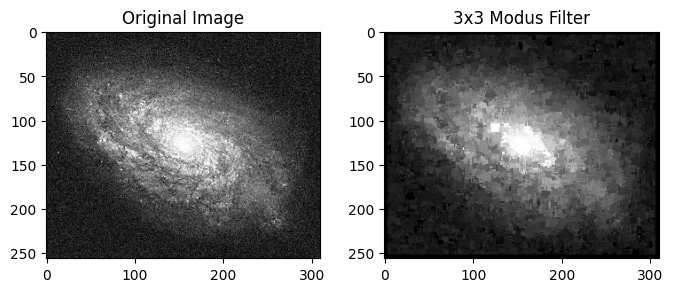

In [ ]:

# MODUS FILTERING

def ModeFilter(image, filter_size):
    # membuat array kosong
    output = np.zeros(image.shape, dtype=np.uint8)

    # membuat padding pada citra input
    pad_width = filter_size // 2
    padded_image = np.pad(image, pad_width, mode='constant')

    # iterasi pada setiap piksel citra input
    for i in range(pad_width, padded_image.shape[0] - pad_width):
        for j in range(pad_width, padded_image.shape[1] - pad_width):
            # membuat array kosong untuk piksel-piksel di dalam filter
            values = np.zeros(filter_size * filter_size, dtype=np.uint8)
            k = 0
            # iterasi pada setiap piksel di dalam filter
            for x in range(-pad_width, pad_width + 1):
                for y in range(-pad_width, pad_width + 1):
                    values[k] = padded_image[i + x, j + y]
                    k += 1
            # mencari nilai modus dari piksel-piksel di dalam filter
            mode_value = np.bincount(values).argmax()
            # menempatkan nilai modus ke dalam citra output
            output[i - pad_width, j - pad_width] = mode_value

    return output

def main():
    # read image
    img_gray = cv2.imread('/content/drive/MyDrive/PCVK/image/noises-20230223T140529Z-001/noises/1.jpg')
    img_gray_galaxy= cv.cvtColor(img_gray, cv.COLOR_BGR2GRAY)


    # use 3x3 mean filter
    modus_3x3_galaxy = ModusFilter(img_gray_galaxy, 9)

     # set up side-by-side image display
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(8)

    # display the original image
    fig.add_subplot(3, 2, 1)
    plt.title('Original Image')
    plt.imshow(img_gray_galaxy, cmap='gray')

    # display 3x3 modus filter
    fig.add_subplot(3, 2, 2)
    plt.title('3x3 Modus Filter')
    plt.imshow(modus_3x3_galaxy, cmap='gray')




    plt.show()
    
if __name__ == "__main__":
    main()


In [ ]:
# CONVOLUTION

def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  image_height, image_width = image.shape

  output_height = (image_height - kernel_height) // stride + 1
  output_width = (image_width - kernel_width) // stride + 1

  image_after = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      image_after[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
      
  return image_after

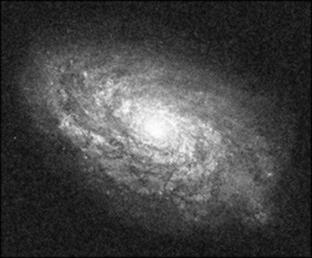

In [ ]:
# Low Pass Filter
low_pass = np.array([[1,1,1],
                    [1,4,1],
                    [1,1,1]])/12

cv2_imshow(convolution2d(img_gray_galaxy, low_pass, 1, 2))


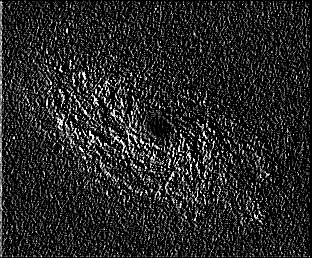

In [ ]:

# High Pass Filter
high_pass = np.array([[-1,0,1],
                      [-1,0,3],
                      [-3,0,1]])

cv2_imshow(convolution2d(img_gray_galaxy, high_pass, 1, 2))
